In [55]:
# SVR

# Cómo importar las librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [130]:
# Importar el data set
dataset = pd.read_csv('./data/max.csv')
X = dataset.iloc[:,0:1].values
y = dataset.iloc[:,1:2].values

In [132]:
dataset.dtypes

carrera    int64
puntos     int64
dtype: object

In [133]:
#Escalado de variables
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

In [134]:
print(y)

[[-2.13766412]
 [ 0.41477065]
 [-2.13766412]
 [ 1.33364717]
 [ 0.51686804]
 [ 0.41477065]
 [-0.60620326]
 [ 0.41477065]
 [ 0.41477065]
 [-1.52507977]
 [ 0.61896543]
 [ 0.41477065]
 [ 0.41477065]
 [ 0.51686804]
 [ 0.51686804]
 [ 0.41477065]]


In [137]:
# Ajustar la regresión con el dataset
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
regression = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regression.fit(X, y)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [140]:
"""from sklearn.svm import SVR
regression = SVR(kernel = "rbf")
regression.fit(X, y)"""

'from sklearn.svm import SVR\nregression = SVR(kernel = "rbf")\nregression.fit(X, y)'

In [148]:
# Predicción de nuestros modelos con SVR
#y_pred = regression.predict([[17]])
y_pred = regression.predict(sc_X.transform([[17]]))
y_pred = sc_y.inverse_transform(y_pred.reshape(-1,1))
y_pred

array([[23.79597787]])

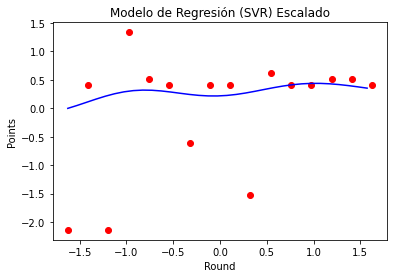

In [186]:

# Visualización de los resultados del SVR
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color = "red")
plt.plot(X_grid, regression.predict(X_grid), color = "blue")
plt.title("Modelo de Regresión (SVR) Escalado")
plt.xlabel("Round")
plt.ylabel("Points")
plt.show()

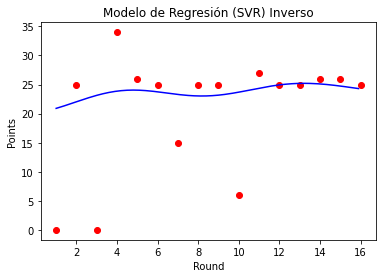

In [187]:
X1=sc_X.inverse_transform(X)
y1=sc_y.inverse_transform(y)

X_grid=np.arange(min(X1), max(X1), 0.1) 
X_grid=X_grid.reshape(len(X_grid),1) 

plt.scatter(X1,y1,color="red")


y_pred = regression.predict(sc_X.transform(X_grid))
y_pred = sc_y.inverse_transform(y_pred.reshape(-1,1))
plt.plot(X_grid,y_pred,color="blue")
plt.title("Modelo de Regresión (SVR) Inverso")
plt.xlabel("Round")
plt.ylabel("Points")
plt.show()